# Temperature penetration

Relates to exercises on page 48.

@olsthoorn, 2012-12-30

The solution for the partial differential equation for heat is the same as for groundwater with head change $s$ replaced by temperature $T$, $kD$ replaced by the ease of heat flow $\lambda$ and storage $S$ replacec by heat capacity $\rho c$

$$ \lambda \frac {\partial^2 T} {\partial x} = \rho c \frac {\partial T} {\partial t} $$

Given the as a boundary condition $T(0, t) = A \sin(\omega (t - \tau)) $, with delay $\tau$ a constant, henceis

$$ T(x, t) = A e^{-a x} \sin(\omega (t - \tau) - a x) $$

with $\omega T = 2 \pi$ and

$$ a = \sqrt{ \frac {\omega \rho c} {2 \lambda} } $$

Because heat is conducted and stored by both the water and the solid (particles) we have, with $\epsilon$ the porosity

$$ \lambda = \epsilon \lambda_w + (1 - \epsilon) \lambda_s $$
$$ \rho c = \epsilon \rho_w c_w - (1 - \epsilon) \rho_s c_s $$

We'll compute the penetration depth of temperature waves at ground surface with a cycle time of 1 d, 1w, 1 month, 1 year, 500 years. The latter may be releavant to detect climate change.

This solution presumes that the heat conductivity and heat capacity are constant from ground surface downward. If this is not the case, for instance because the first meters are unsaturate, then the problem may be split in two seprate ones and glued together at the water table (or rather the capillary fringe). This is a good exercise for the student. Moist sand will have a heat conductivity between 0.25 and 2 W/m/K depending on the water content. Also, the heat capacity has to be adopted to the actual moist content. 6% may be a good guess.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rho_w = 1000 # kg/m3
rho_s = 2650 # kg/m3
c_w = 4018 # J/kg/K
c_s =  800 # J/kg/K
eps = 0.35 # porosity

rhoc = eps * rho_w * c_w + (1 - eps) * rho_s * c_s
lamb = 3 # W/m/K  (K = kelvin), mostly 2 - 4 (water + sand)

A = 10.0 # K, temperature amplitude

The most practical information is the envelope of the waves belonging to the different cycle times

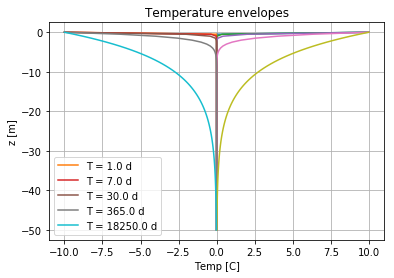

In [13]:
Times = np.array([1, 7, 30, 365, 50 * 365]) * 86400 # cycle times [d]
z = np.linspace(0, 50, 101)   # m

plt.title("Temperature envelopes")
plt.xlabel('Temp [C]')
plt.ylabel('z [m]')
plt.grid()

# for each curve loop over t
for T in Times:
    omega = 2 * np.pi / T
    a = np.sqrt(omega * rhoc / 2 * lamb)
    y = A * np.exp(-a * z)
    plt.plot( y, -z)
    plt.plot(-y, -z, label="T = {:.1f} d".format(T / 86400))
    
plt.legend()
plt.show()